In [57]:
# Импортируем в Блок требуемые библиотеки

# Блок основных библиотек
import pandas as pd
import numpy as np
import math

# Блок графических пакетов
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import pylab
%matplotlib inline
sns.set_style('darkgrid')

# Блок библиотеки sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error # метрика для проверки 
from sklearn.model_selection import cross_val_score, cross_val_predict

import statsmodels.api as sm 

# Блок для создания нейронной сети
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AlphaDropout, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pickle

# Блок исключеия вывода предупреждающих ошибок
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore")

In [2]:
# Блок импорта созданых функций для проекта из папки modules_def
%run ./modules_def/optimize_memory_usage.ipynb

In [ ]:
# Блок создания нейронной сети, которая будет рекомендовать:
#'ratio_filler_matrix' RFM - Соотношение матрица-наполнитель 

In [3]:
# Версия tensorflow
print(tf.__version__)

2.10.0


In [ ]:
# Нейронная сеть для предсказания соотношения матрица-наполнитель

!!!!!! http://mei06.narod.ru/sem7/iis/shpora/page2_9.htm
Многослойные нейронные сети прямого распространения (МНСПР)
Выбор параметров сети.

Элементы нейронной сети
Входной слой: этот слой принимает входные функции. Он предоставляет информацию из внешнего мира в сеть, 
на этом уровне вычисления не выполняются, узлы здесь просто передают информацию (функции) скрытому слою.

Скрытый слой / слои-  это слой не подвергается воздействию внешнего мира, он являются частью абстракции, 
предоставляемой любой нейронной сетью. Скрытый слой выполняет все виды вычислений над объектами, 
введенными через входной слой, и передает результат на выходной слой.

Выходной уровень: этот уровень выводит информацию, полученную сетью, во внешний мир.

В настоящее время нет никаких жестких правил ни для выбора количества скрытых слоев, 
ни для выбора количества нейронов в них. Хотя существуют ограничения, помогающие принимать решения.
Критерии выбора количество слоев.
1) Если функция определена на конечном множестве точек, то 3-ехслойный перцептрон способен ее апроксимировать.
2) Если функция непрерывна и определена на компактной области, то 3-ехслойный перцептрон способен ее апроксимировать.
3) Остальные функции, которым могут быть обучены нейронные сети, могут быть апроксимированы 4-ехслойным перцетроном.
Таким образом, теоретически максимальное количество слоев, которое необходимо – четыре, или два скрытых слоя. 

Вывод: C учетом наших исследований по корреляции (фактически ее отсутствия)
принимаем 3 вариант построения нейронной сети, т.е. у нас будет 4 слоя:

Количество нейронов в скрытых слоях.
Слишком малое количество – и сеть не сможет обучиться. 
Слишком большое повлечет за собой увеличение времени обучения сети до фактически нереального значения. 
Также это может привести к переобученности сети (overfitting), проявляющейся в том, 
что сеть будет прекрасно работать на обучающей выборке, но очень плохо на входных примерах не входящих в нее.

Это происходит из-за того, что сеть будет обладать избыточными способностями к обучению
и наряду со значительными для данной задачи факторами будет учитывать черты, 
характерные лишь для данной обучающей выборки.

Однако, существуют эвристические правила выбора количества нейронов в скрытых слоях. 
Одним из таких правил является правило  геометрической пирамиды (geometric pyramid rule).  
Для 3-ех слойного перцептрона, по этому правилу ,число нейронов скрытого слоя  вычисляетмя по следующей формуле:
k = sqrt(n * m)                      
где
k – число нейронов в скрытом слое,
n – число нейронов во входном слое;
m –  число нейронов в выходном слое.
Для 4-ехслойного перцептрона число нейронов вычисляется несколько сложнее:
r = sqrt^3(n/m)( кубический корень)
где 
к1= m * r2 - число нейронов в первом скрытом слое;
к2 = m * r - число нейронов во втором скрытом слое.   

In [4]:
# У нас 1  имеется целевая переменная - 'ratio_filler_matrix' RFM - Соотношение матрица-наполнитель
# Следовательно, у нас будет 1 нейрон на выходе
# На входе  DF у нас остаются 12 признаков.
# Следоватьльно у нас на входе нейроной сети будет  12 нейронов.  

# Проведем расчет количества нейронов в 2 - х скрытых слоях по правилу  геометрической пирамиды: 
# k -                 # число нейронов в скрытом слое
n = 12              # число нейронов во входном слое
m = 1               # число нейронов в выходном слое 
r = (n/m) **(1.0/3.0)
k1 = m * r**2       # число нейронов в 1-м скрытом слое
k2 = m * r          # число нейронов во 2-м скрытом слое

In [5]:
print('число нейронов во входном слое - ', n)
print('число нейронов в выходном слое - ', m)
print('число нейронов в 1-м скрытом слое - ', math.ceil(k1)) # округляем в большую сторону
print('число нейронов во 2-м скрытом слое - ', math.ceil(k2)) # округляем в большую сторону

число нейронов во входном слое -  12
число нейронов в выходном слое -  1
число нейронов в 1-м скрытом слое -  6
число нейронов во 2-м скрытом слое -  3


Выбор Активационных функций

Функция активации решает, следует ли активировать нейрон или нет, путем вычисления взвешенной суммы 
и дальнейшего добавления к ней смещения. 
Целью функции активации является введение нелинейности в выходной сигнал нейрона.

Варианты функции активации
Линейная функция
Использование: Функция линейной активации используется только в одном месте, т.Е. на выходном уровне.

Функция RELU
Это означает выпрямленную линейную единицу. Это наиболее широко используемая функция активации. 
В основном реализованы в скрытых слоях нейронной сети.
Природа: - нелинейная, что означает, что мы можем легко распространять ошибки в обратном направлении и иметь несколько слоев нейронов, активируемых функцией ReLU.
Использует: - ReLU менее дорогостоящий в вычислительном отношении, чем tanh и sigmoid, поскольку он включает в себя более простые математические операции. Одновременно активируется только несколько нейронов, что делает сеть разреженной, что делает ее эффективной и простой для вычислений.
Проще говоря, RELU обучается намного быстрее, чем sigmoid и функция Tanh.

Функция активации SELU
масштабированная экспоненциальная линейная единица или функцию активации SELU
масштабируемые экспоненциальные линейные единицы" (SELU)
Эта функция активации, которая обладает свойствами самонормализации, гарантирует, 
что все выходные данные будут нормализованы без явного добавления слоя нормализации в вашу модель. 
Что лучше, так это то, что его можно использовать относительно легко и что он обеспечивает адекватные результаты,
Important:
1. When using SELU, the LecunNormal() initializer must be used -  kernel_initializer='lecun_normal'
2. When using SELU and Dropout, AlphaDropout() must be used

Масштабируемая экспоненциальная линейная единица или функция активации SELU может использоваться для объединения
эффектов RELU и пакетной нормализации,что устраняет необходимость в использовании BatchNorm.

In [7]:
# Для проведения исследования целевого 'ratio_filler_matrix' RFM - Соотношение матрица-наполнитель 
# считываем ПОЛНЫЙ df: data_main_clean который был очищен от выбросов в блоке 1
data_main_clean = pd.read_csv(r'data_storage\data_block1_clean\data_main_clean.csv')

In [8]:
list(data_main_clean)

['pattern_angle',
 'step_strip',
 'density_strip',
 'ratio_filler_matrix',
 'density',
 'elasticity_module',
 'number_hardeners',
 'content_epoxy_groups',
 'flash_temperature',
 'surface_density',
 'elasticity_module_stretching',
 'strapery_strength',
 'resin_consumption']

In [9]:
# Изменим порядок столбцов, для наглядной работы в Блоке написания приложения FLASK.
# Поставим на ПЕРВОЕ место наш целевой показатель 'ratio_filler_matrix' - Соотношение матрица-наполнитель
# Запишем в новый df - data_main_clean_flask
data_main_clean_flask = data_main_clean.reindex(columns=['ratio_filler_matrix',
                                                         'pattern_angle',
                                                         'step_strip',
                                                         'density_strip',
                                                         'density',
                                                         'elasticity_module',
                                                         'number_hardeners',
                                                         'content_epoxy_groups',
                                                         'flash_temperature',
                                                         'surface_density',
                                                         'elasticity_module_stretching',
                                                         'strapery_strength',
                                                         'resin_consumption'
                                                         ])

In [10]:
data_main_clean_flask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ratio_filler_matrix           935 non-null    float64
 1   pattern_angle                 935 non-null    int64  
 2   step_strip                    935 non-null    float64
 3   density_strip                 935 non-null    float64
 4   density                       935 non-null    float64
 5   elasticity_module             935 non-null    float64
 6   number_hardeners              935 non-null    float64
 7   content_epoxy_groups          935 non-null    float64
 8   flash_temperature             935 non-null    float64
 9   surface_density               935 non-null    float64
 10  elasticity_module_stretching  935 non-null    float64
 11  strapery_strength             935 non-null    float64
 12  resin_consumption             935 non-null    float64
dtypes: fl

In [11]:
# Получим MIN и MAX (диапазоны значений по параметрам) данных в столбцах
# для организации приложения Flask в качестве ориентира введения занчений
# для расчета целевой переменой ratio_filler_matrix Сотношение матрица-наполнитель

df_min_max_flask = pd.DataFrame({
             'ratio_filler_matrix':[0.6, 5.3],
                   'pattern_angle':[0, 1],
                      'step_strip':[1.6, 13.0],
                  'density_strip' :[30.0, 86.0],
                        'density' :[1790.0, 2160.0],
              'elasticity_module' :[54.0, 1560.0],
                'number_hardeners':[36.0, 180.0],     
            'content_epoxy_groups':[16.5, 28.5],
               'flash_temperature':[187.0, 385.0],
                'surface_density' :[30.0, 1200.0],
    'elasticity_module_stretching':[66.0, 81.0],
              'strapery_strength' :[1326.0, 3600.0],
               'resin_consumption':[80.0, 350.0],
                                }) 

In [12]:
df_min_max_flask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ratio_filler_matrix           2 non-null      float64
 1   pattern_angle                 2 non-null      int64  
 2   step_strip                    2 non-null      float64
 3   density_strip                 2 non-null      float64
 4   density                       2 non-null      float64
 5   elasticity_module             2 non-null      float64
 6   number_hardeners              2 non-null      float64
 7   content_epoxy_groups          2 non-null      float64
 8   flash_temperature             2 non-null      float64
 9   surface_density               2 non-null      float64
 10  elasticity_module_stretching  2 non-null      float64
 11  strapery_strength             2 non-null      float64
 12  resin_consumption             2 non-null      float64
dtypes: float6

In [13]:
# Запишем df_min_max_flask в директорию data_storage\data_block5_flask\ 
# для последующего использования в приложении Flask
df_min_max_flask.to_csv(r'data_storage\data_block5_flask\df_min_max_flask.csv', index=False)

# Продолжаем работу над блоком N 4 по созданию нейронной сети

In [14]:
# Выделяем целевую переменную 'y'-  'ratio_filler_matrix'  _RFM из data_main_clean_flask
y_RFM = data_main_clean_flask[['ratio_filler_matrix']]
X_RFM = data_main_clean_flask.drop(columns=['ratio_filler_matrix'])

In [18]:
scaler_y= MinMaxScaler() 
list_data_y = list(y_RFM)
data_scaler_y_norm = scaler_y.fit_transform(y_RFM)    
data_scaler_y_norm = pd.DataFrame(data = data_scaler_y_norm, columns = list_data_y)

In [19]:
data_scaler_y_norm.describe() # данные нормализованы

,ratio_filler_matrix
count,935.000000
mean,0.498549
std,0.187746
min,0.000000
25%,0.373697
50%,0.494837
75%,0.630121
max,1.000000


In [20]:
# Нормализация по целевой переменной X
scaler_X = MinMaxScaler()
list_data_X = list(X_RFM)
data_scaler_X_norm = scaler_X.fit_transform(X_RFM)    
data_scaler_X_norm = pd.DataFrame(data = data_scaler_X_norm, columns = list_data_X)

In [21]:
data_scaler_X_norm.describe() # данные нормализованы

,pattern_angle,step_strip,density_strip,density,elasticity_module,number_hardeners,content_epoxy_groups,flash_temperature,surface_density,elasticity_module_stretching,strapery_strength,resin_consumption
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.511230,0.457878,0.492296,0.502641,0.442185,0.511047,0.481879,0.497636,0.371760,0.486771,0.499707,0.490634
std,0.500141,0.199628,0.197568,0.187324,0.201045,0.185225,0.184314,0.198703,0.216543,0.200257,0.195697,0.203170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.310748,0.364711,0.370227,0.296743,0.383492,0.351065,0.360774,0.204327,0.352799,0.363982,0.352349
50%,1.000000,0.454338,0.488019,0.511293,0.438043,0.508163,0.478647,0.498293,0.350415,0.481875,0.496497,0.484308
75%,1.000000,0.590878,0.624528,0.624833,0.580116,0.645946,0.614967,0.634028,0.536507,0.621867,0.629312,0.628170
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'''
Нормализация старая для всего df

scaler_df = MinMaxScaler()data_scaler_y_norm 
list_data = list(data_main_clean_flask)
data_norm = scaler_df.fit_transform(data_main_clean_flask)
data_norm = pd.DataFrame(data = data_norm, columns = list_data)

Проводим разделение  нашего df- data_norm: на train и test
X_train_RFM, X_test_RFM, y_train_RFM, y_test_RFM = train_test_split(X_RFM, y_RFM, test_size=0.3, random_state = 40)
print("Размер X_train_RFM: ", X_train_RFM.shape)
print("Размер y_train_RFM: ", y_train_RFM.shape)
print("Размер X_test_RFM:  ", X_test_RFM.shape)
print("Размер y_test_RFM:  ", y_test_RFM.shape)
'''

In [22]:
# Понизим размерность df data_scaler_y_norm и data_scaler_X_norm c  float64 до float32 для ускорения расчетов
# вызываем функцию optimize_memory_usage из модуля modules_def
data_scaler_y_norm = optimize_memory_usage(data_scaler_y_norm, print_info_befor=False, print_info_after=True)

Memory usage size: before 0.0073 Mb - after 0.0037 Mb (49.2%).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ratio_filler_matrix  935 non-null    float32
dtypes: float32(1)
memory usage: 3.8 KB
None
--------------------------------------------------------------------------------


In [23]:
data_scaler_X_norm = optimize_memory_usage(data_scaler_X_norm, print_info_befor=False, print_info_after=True)

Memory usage size: before 0.0857 Mb - after 0.0429 Mb (49.9%).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 935 non-null    float32
 1   step_strip                    935 non-null    float32
 2   density_strip                 935 non-null    float32
 3   density                       935 non-null    float32
 4   elasticity_module             935 non-null    float32
 5   number_hardeners              935 non-null    float32
 6   content_epoxy_groups          935 non-null    float32
 7   flash_temperature             935 non-null    float32
 8   surface_density               935 non-null    float32
 9   elasticity_module_stretching  935 non-null    float32
 10  strapery_strength             935 non-

In [ ]:
# Проводим разделение  нашего df- data_scaler_y_norm и data_scaler_X_norm: на train и test

In [25]:
# Для data_scaler_y_norm
y_train_RFM, y_test_RFM = train_test_split(data_scaler_y_norm, test_size=0.3, random_state = 40)
print("Размер y_train_RFM: ", y_train_RFM.shape)
print("Размер y_test_RFM:  ", y_test_RFM.shape)

Размер y_train_RFM:  (654, 1)
Размер y_test_RFM:   (281, 1)


In [27]:
# Для data_scaler_X_norm
X_train_RFM, X_test_RFM = train_test_split(data_scaler_X_norm, test_size=0.3, random_state = 40)
print("Размер X_train_RFM: ", X_train_RFM.shape)
print("Размер X_test_RFM:  ", X_test_RFM.shape)

Размер X_train_RFM:  (654, 12)
Размер X_test_RFM:   (281, 12)


In [28]:
# создаем последовательную модель нейронной сети
# и создадим объект  класса
model_RFM = Sequential()

In [29]:
# Создаем нейросеть из 4 слоев:
# 1-й - Входной слой размерность n = 12 - по количеству пареметров в нашем df
# 2-й - Скрытый слой размеростью k1 = 6 - получен из расчета по правилу геометрической пирамиды (geometric pyramid rule)
# 3-й - Скрытый слой размеростью k2 = 3 - получен из расчета по правилу геометрической пирамиды (geometric pyramid rule)
# 4-й - Выходной слой размерностью m = 1 - по количеству целевых параметров

model_RFM.add(Dense(12)) # входной полносвязный слой
model_RFM.add(Dense(6, kernel_initializer='lecun_normal', activation='selu')) 
model_RFM.add(AlphaDropout(0.25))
model_RFM.add(Dense(3, kernel_initializer='lecun_normal', activation='selu'))
model_RFM.add(AlphaDropout(0.25))
model_RFM.add(Dense(1, activation= 'linear'))  # выходной слой

In [30]:
# stop_RFM  - индикатор для остановки обучения нейросети, когда она перестает улучшаться в течении 10 эпох - patience=10. 
stop_RFM = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto') # было 10

In [31]:
# Компиляция модели. Вызывать будем оптимизатор по имени Adam.
# learning_rate=0.02 -  Шаг обучения 0.02 
# lossи -функция ошибки - "средняя абсолютная ошибка"
model_RFM.compile(optimizer = tf.optimizers.Adam(learning_rate=0.02), loss = 'mean_absolute_error')

In [ ]:
# Запускаем модель на обучение

In [32]:
%%time
history_RFM = model_RFM.fit(          
    X_train_RFM,             # входящая выборка
    y_train_RFM,             # целевая выборка
    batch_size = 32,         # вычисляем градиенты каждые 32 наблюдений
    epochs=100,              # max 100 эпох, stop_RFM у нас создан
    verbose=1,               # индикатор выполнения
    validation_split = 0.2,  # доля обучающих данных, для проверки 
    callbacks = [stop_RFM]   # условие остановки при прекращении обучения в течении 10 эпох
    )

Epoch 1/100
17/17 [==============================] - 1s 17ms/step - loss: 0.5403 - val_loss: 0.1807
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3409 - val_loss: 0.2090
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1941 - val_loss: 0.1508
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1555 - val_loss: 0.1797
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1550 - val_loss: 0.1554
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1531 - val_loss: 0.1415
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1535 - val_loss: 0.1440
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1508 - val_loss: 0.1519
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1509 - val_loss: 0.1429
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1533 - val_loss: 0.1731
Epoch 11

In [ ]:
# Модел остановила работу на 35 эпохе - сработол стоппер!

In [33]:
# Оценка модели по лучшему расчетному показателю MAE
evaluation_model = model_RFM.evaluate(x= X_test_RFM, 
                                     y=y_test_RFM)
print("Оценка модели = ", evaluation_model)

9/9 [==============================] - 0s 1ms/step - loss: 0.1634
Оценка модели =  0.1633787751197815


In [ ]:
# Лучший показатель MAE был достигнут во время 9 эпохи  и составил MAE(9) = 0.1633

In [34]:
model_RFM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 alpha_dropout (AlphaDropout  (None, 6)                0         
 )                                                               
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 alpha_dropout_1 (AlphaDropo  (None, 3)                0         
 ut)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 4

In [ ]:
# Всего обучены были 259 параметров

In [81]:
# Функции для обработки результатов работы нейронной сети

# Функция model_loss_plot построения графика потерь модели на тренировочной и тестовой выборках
# Параметры, передаваемые в функцию:
# model_history- наша модель
# graf_name_path - путь записи в директорию fig_block1_clean имени рисунка 
def model_loss_plot(model_history, graf_name_path):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'], label = 'Точность обучающей выборки')
    plt.plot(model_history.history['val_loss'], label = 'Точность тестовой выборки')
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(loc='best')
    plt.savefig(graf_name_path, dpi=100) # Сохраняем рисунок таблицы в папку save_fig
    plt.show()

# Функция actual_predict_plot для визуализации тестовых и прогнозных значений
# Передаваемые в функцию параметры:
# actual - значение y_Test_RFM_norm
#'target_parameter' - целевая переменная
# model_name - имя рассматриваемой модел

def actual_predict_plot(actual, pred, target_param, model_name, graf_name_path): 
    plt.figure(figsize=(17,5))
    plt.title(f'Динамика тестовых и прогнозных значения:', size =12)
    plt.plot(actual, label='Тест')
    plt.plot(pred, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel(target_param, size = 12)
    plt.xlabel('Количество наблюдений', size = 12)
    plt.savefig(graf_name_path, dpi=100) # Сохраняем рисунок таблицы в папку save_fig
    plt.show()

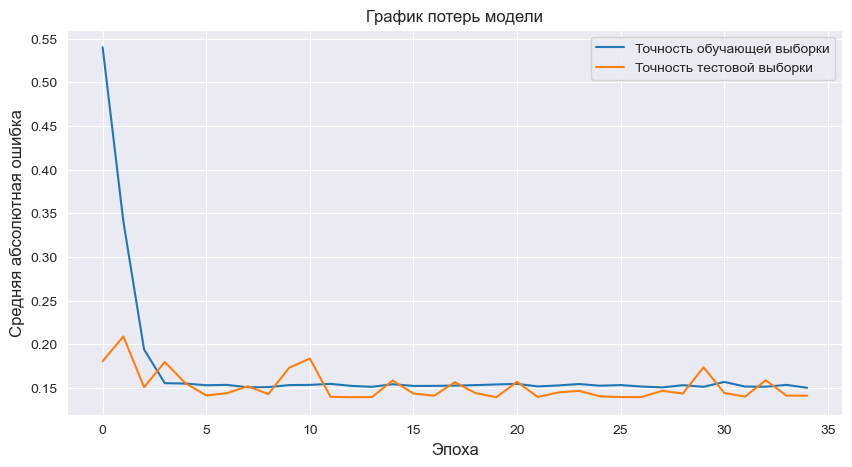

In [80]:
# Построение графика ошибки MAE - mean_absolute_error функцией model_loss_plot
model_loss_plot(history_RFM, graf_name_path = r'save_fig\fig_block4_neuro\model_loss_MAE_flask.png')

In [ ]:
# Динамическая оценка модели    
y_pred_RFM = model_RFM.predict(np.array((X_test_RFM)))
actual = y_test_RFM.values
predicted = y_pred_RFM

In [37]:
y_pred_RFM.shape

(281, 1)

In [48]:
# Выводим первое значений нашего предсказанного моделью model_RFM значения целевой переменной
# для сравнения с  результатами из записаной и загруженой вновь модели
y_pred_RFM[0][0]

0.4555432

In [ ]:
# Диапазон нашей целевой перемнной 'ratio_filler_matrix' действительно лежит в пределах 0.6 - 5.3!!!!

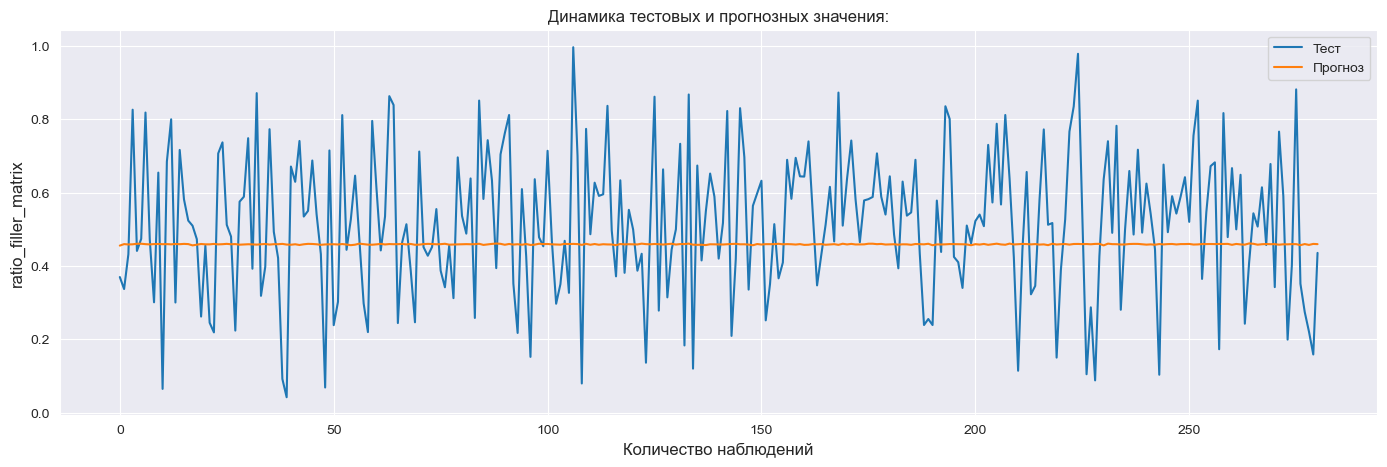

In [82]:
# Построение графика Оценки модели Тест/Прогноз
actual_predict_plot(actual, predicted, 'ratio_filler_matrix', model_RFM, 
                    graf_name_path = r'save_fig\fig_block4_neuro\test_predict_model_flask.png')

In [68]:
# Сохранение модели в папку
model_RFM.save(r'data_storage\data_block5_flask\model_RFM_flask') 

INFO:tensorflow:Assets written to: data_storage\data_block5_flask\model_RFM_flask\assets


In [83]:
#  Сохранение 'MinMaxScaler'
with open(r'data_storage\data_block5_flask\model_RFM_flask\scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y,f)

In [84]:
with open(r'data_storage\data_block5_flask\model_RFM_flask\scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X,f)

In [70]:
# Загрузка сохраненой модели из папки
loaded_model_RFM = keras.models.load_model(r'data_storage\data_block4_neuro\model_RFM_flask')
loaded_model_RFM.predict(X_test_RFM)[0][0] # проверка загруженой модели- совпадает с рабочей!

9/9 [==============================] - 0s 2ms/step


0.4555432

In [72]:
# загрузка 'MinMaxScaler'
with open(r'data_storage\data_block5_flask\model_RFM_flask\scaler_y.pkl', 'rb') as f:
    scaler_y = pickle.load(f)
with open(r'data_storage\data_block5_flask\model_RFM_flask\scaler_X.pkl', 'rb') as f:
    scaler_X = pickle.load(f)

In [66]:
# Переводим полученное значение y_pred_RFM в естественную шкалу значений по процедуре inverse_transform
y_pred_origin_data = scaler_y.inverse_transform(np.array(y_pred_RFM))
y_pred_origin_data[0][0]

2.7188525

In [ ]:
# Результаты совпали с данными полученными перед сохранением модели  в папку

Выводы:
1. Для работы с нейросетью был применен полный очищенный от выбросов df df data_main_clean.csv, который получен в Блоке №1.

2. Проведен обоснованный расчет количества слоев нейронной сети, количества нейронов в каждом слое и выбор активационных функции для каждого слоя.

3. Для последующей работы при создании приложения на flask  целевой параметр'ratio_filler_matrix' был перемещен на первй столбец в data_main_clean_flask. Также создан df_min_max_flask для приложения flask с границами допусимых значений для ввода значений пользователя при расчете целевого парметра.

4. Написана нейронная сеть, которая будет рекомендовать соотношение целевого параметра'ratio_filler_matrix' “Матрица-наполнитель”.

5. Оценены точности моделей на тренировочном и тестовом датасете.

6. Методом обратной инверсии проверено ,что предсказанные моделью данные y_pred , полученные в нормализованном виде при инверсии на сохраненной и вновь загруженой моделе, показывают отличное корреляцию с естественной размерностью данного параметра.

6. Предобученная модел нейронной сети была сохранена в директории data_storage/data_block4_neuro/model_RFM_flask.

7. Полученные в процессе работы Блока 4 графики записаны в соответствующую директорию save_fig/fig_block4_neuro.

In [ ]:
# конец Блока № 4 Создана нейронная сеть по прогнозированию
# целевого парметра 'ratio_filler_matrix' RFM - Соотношение матрица-наполнитель